 # PROJECT TITLE 
## Climate-Driven Landslide Susceptibility Prediction in India: An SNN-Based Risk Assessment Framework for Disaster Management 

### Project Description
This project implements a machine learning-based landslide prediction system using Superposable Neural Networks (SNNs) for climate risk assessment in India. The system integrates geospatial, climatic, and topographic data to predict landslide susceptibility at high spatial resolution (100m), focusing on climate change impacts and early warning capabilitie s

### Problem Statement
India faces severe landslide threats due to complex topography, monsoon rainfall patterns, and climate change impacts. With approximately 30% of India's landmass covered by mountain ranges and 22 states affected by landslides, there is an urgent need for accurate prediction systems to mitigate risks and save lives. This project develops a Spatial Neural Network (SNN) model for landslide susceptibility prediction as a climate risk management tool.

In [11]:
!pip install pandas numpy matplotlib seaborn scikit-learn tensorflow keras geopandas folium plotly jupyterlab xgboost lightgbm rasterio earthpy

In [12]:
#imports and datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

landslide_inventory = pd.read_csv(r"C:\Users\keert\Downloads\landslide_inventory_india.csv")
susceptibility_data = pd.read_csv(r"C:\Users\keert\Downloads\landslide_susceptibility_features.csv")
climate_data = pd.read_csv(r"C:\Users\keert\Downloads\climate_data_sample.csv")
metadata = pd.read_csv(r"C:\Users\keert\Downloads\dataset_metadata.csv")

print("Landslide Inventory:", landslide_inventory.shape)
print("Susceptibility Features:", susceptibility_data.shape)
print("Climate Data:", climate_data.shape)


Landslide Inventory: (1000, 12)
Susceptibility Features: (5000, 32)
Climate Data: (1000, 11)


## Phase 1: Exploratory Data Analysis


In [13]:
#basic data exploration
def explore_dataset(df, name):
    print(f"\n{'='*40}\nExploring {name}\n{'='*40}")
    print("Shape:", df.shape)
    print("Columns:", list(df.columns))
    print("\nMissing values:\n", df.isnull().sum())
    print("\nData types:\n", df.dtypes)
    display(df.describe())
#Explore each
explore_dataset(landslide_inventory, "Landslide Inventory")
explore_dataset(susceptibility_data, "Susceptibility Features")
explore_dataset(climate_data, "Climate Data")


Exploring Landslide Inventory
Shape: (1000, 12)
Columns: ['Landslide_ID', 'Latitude', 'Longitude', 'State', 'District', 'Date_Occurred', 'Landslide_Type', 'Area_sqm', 'Casualties', 'Damage_Level', 'Trigger', 'Validation_Status']

Missing values:
 Landslide_ID         0
Latitude             0
Longitude            0
State                0
District             0
Date_Occurred        0
Landslide_Type       0
Area_sqm             0
Casualties           0
Damage_Level         0
Trigger              0
Validation_Status    0
dtype: int64

Data types:
 Landslide_ID          object
Latitude             float64
Longitude            float64
State                 object
District              object
Date_Occurred         object
Landslide_Type        object
Area_sqm             float64
Casualties             int64
Damage_Level          object
Trigger               object
Validation_Status     object
dtype: object


,Latitude,Longitude,Area_sqm,Casualties
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,22.659851,79.313997,4894.269443,0.279000
std,9.059983,6.550674,4821.472104,1.144757
min,8.049659,72.004717,2.990588,0.000000
25%,14.304724,74.452731,1417.038198,0.000000
50%,20.505607,76.384983,3491.857984,0.000000
75%,31.381863,84.153933,6878.852313,0.000000
max,34.992248,94.987688,38617.647610,10.000000



Exploring Susceptibility Features
Shape: (5000, 32)
Columns: ['Point_ID', 'Latitude', 'Longitude', 'Elevation', 'Slope', 'Aspect', 'Curvature', 'TRI', 'TPI', 'Annual_Precipitation', 'Monsoon_Precipitation', 'Max_Daily_Precipitation', 'Antecedent_Rainfall_7d', 'Antecedent_Rainfall_15d', 'Antecedent_Rainfall_30d', 'Mean_Temperature', 'Min_Temperature', 'Max_Temperature', 'Temperature_Range', 'Lithology', 'Fault_Density', 'Distance_to_Fault', 'NDVI', 'Land_Use', 'Forest_Cover', 'Distance_to_Road', 'Road_Density', 'Slope_Precipitation', 'Elevation_Slope', 'Aspect_Relief', 'Susceptibility_Score', 'Susceptibility_Class']

Missing values:
 Point_ID                   0
Latitude                   0
Longitude                  0
Elevation                  0
Slope                      0
Aspect                     0
Curvature                  0
TRI                        0
TPI                        0
Annual_Precipitation       0
Monsoon_Precipitation      0
Max_Daily_Precipitation    0
Antecedent

,Latitude,Longitude,Elevation,Slope,Aspect,Curvature,TRI,TPI,Annual_Precipitation,Monsoon_Precipitation,...,NDVI,Land_Use,Forest_Cover,Distance_to_Road,Road_Density,Slope_Precipitation,Elevation_Slope,Aspect_Relief,Susceptibility_Score,Susceptibility_Class
count,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,22.428345,82.603950,4451.69284,14.950120,177.593354,-0.000460,24.760692,0.125156,1162.134160,870.706340,...,0.639782,2.82860,0.235010,994.215220,0.508294,17.383588,7.478108,-0.001217,3.216858,1.943000
std,8.326915,8.354041,2539.44229,14.550468,104.391478,0.100344,14.574156,10.113176,1056.377526,801.159486,...,0.178425,1.77861,0.190855,983.722842,0.500495,27.842863,9.439704,0.071984,1.778352,1.121785
min,8.004255,68.002851,0.94000,0.000000,0.000000,-0.360200,0.000000,-35.900000,0.000000,0.000000,...,0.115000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.300200,-1.570000,0.000000
25%,15.077283,75.511523,2222.13500,4.390000,85.710000,-0.068100,12.105000,-6.842500,335.500000,249.375000,...,0.511000,1.00000,0.081000,290.875000,0.145000,1.980000,1.330000,-0.037325,1.980000,1.000000
50%,22.320642,82.564843,4508.51000,10.530000,175.690000,-0.000200,24.435000,0.160000,843.750000,623.150000,...,0.655000,2.00000,0.188500,698.300000,0.358500,7.050000,4.110000,-0.000400,3.050000,2.000000
75%,29.604312,89.863981,6614.64500,20.742500,267.727500,0.066900,37.502500,7.060000,1678.475000,1242.850000,...,0.779000,4.00000,0.348000,1374.000000,0.707250,21.070000,9.920000,0.035725,4.260000,3.000000
max,36.984131,96.999769,8847.62000,90.000000,359.950000,0.360300,50.000000,34.100000,4000.000000,3595.700000,...,0.992000,7.00000,0.942000,7899.700000,5.318000,320.910000,85.420000,0.339200,9.720000,4.000000



Exploring Climate Data
Shape: (1000, 11)
Columns: ['Station_ID', 'Latitude', 'Longitude', 'Year', 'Month', 'Temperature_Mean', 'Temperature_Min', 'Temperature_Max', 'Precipitation', 'Humidity', 'Wind_Speed']

Missing values:
 Station_ID          0
Latitude            0
Longitude           0
Year                0
Month               0
Temperature_Mean    0
Temperature_Min     0
Temperature_Max     0
Precipitation       0
Humidity            0
Wind_Speed          0
dtype: int64

Data types:
 Station_ID           object
Latitude            float64
Longitude           float64
Year                  int64
Month                 int64
Temperature_Mean    float64
Temperature_Min     float64
Temperature_Max     float64
Precipitation       float64
Humidity            float64
Wind_Speed          float64
dtype: object


,Latitude,Longitude,Year,Month,Temperature_Mean,Temperature_Min,Temperature_Max,Precipitation,Humidity,Wind_Speed
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,25.401332,79.362520,2015.756000,6.484000,20.307400,15.307400,28.307400,78.085000,67.215300,8.630100
std,7.604716,5.293395,3.760666,3.456833,6.438489,6.438489,6.438489,130.027532,14.891339,3.755975
min,13.865000,72.907100,2010.000000,1.000000,3.300000,-1.700000,11.300000,0.100000,40.000000,2.000000
25%,16.560900,74.458000,2012.000000,3.000000,15.975000,10.975000,23.975000,10.200000,54.475000,5.400000
50%,26.941800,80.632200,2016.000000,6.000000,20.100000,15.100000,28.100000,28.300000,69.700000,8.900000
75%,30.382700,81.863200,2019.000000,9.000000,24.900000,19.900000,32.900000,84.075000,78.300000,11.900000
max,36.530000,94.721500,2022.000000,12.000000,38.500000,33.500000,46.500000,1000.000000,94.900000,15.000000


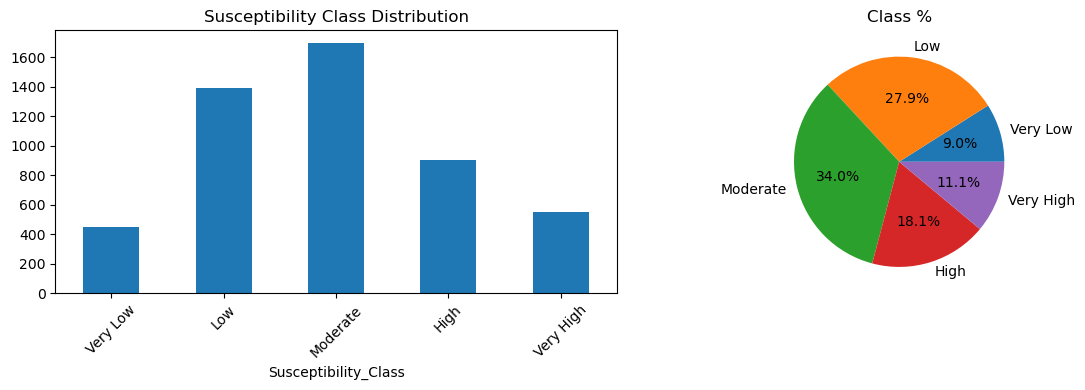

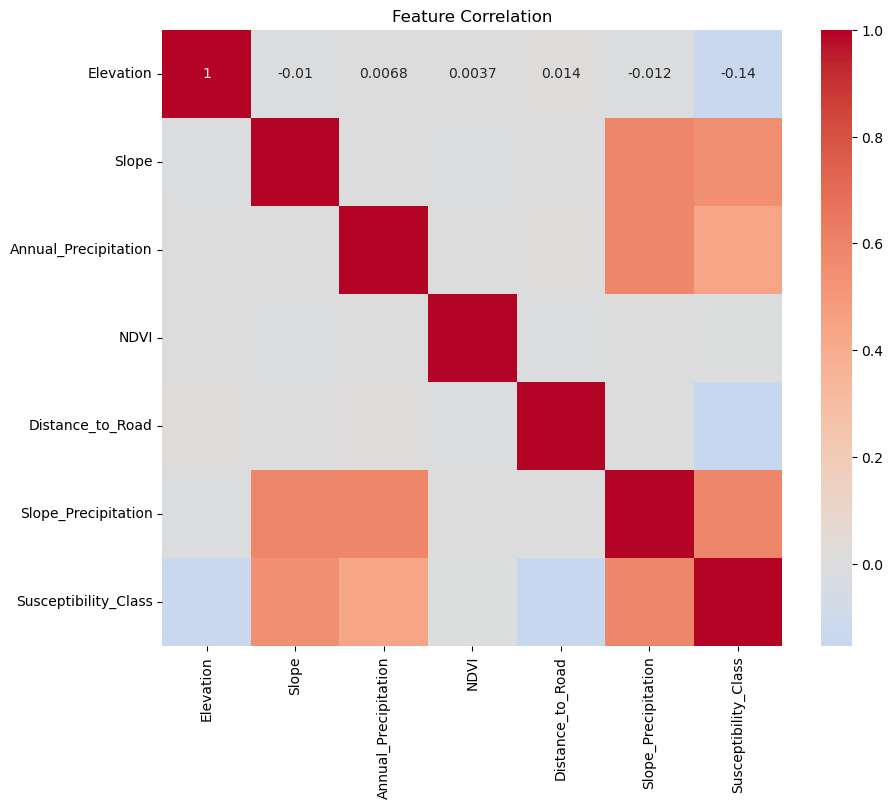

In [14]:
#Visualize Class Distribution & Correlations
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
susceptibility_data['Susceptibility_Class'].value_counts().sort_index().plot(kind='bar')
plt.title('Susceptibility Class Distribution')
plt.xticks(range(5), ['Very Low','Low','Moderate','High','Very High'], rotation=45)
plt.subplot(1,2,2)
plt.pie(susceptibility_data['Susceptibility_Class'].value_counts().sort_index(),
labels=['Very Low','Low','Moderate','High','Very High'], autopct='%1.1f%%')
plt.title('Class %')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,8))
corr = susceptibility_data[['Elevation','Slope','Annual_Precipitation','NDVI','Distance_to_Road','Slope_Precipitation','Susceptibility_Class']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation')
plt.show()

In [15]:
landslide_inventory.info()
susceptibility_data.info()
climate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Landslide_ID       1000 non-null   object 
 1   Latitude           1000 non-null   float64
 2   Longitude          1000 non-null   float64
 3   State              1000 non-null   object 
 4   District           1000 non-null   object 
 5   Date_Occurred      1000 non-null   object 
 6   Landslide_Type     1000 non-null   object 
 7   Area_sqm           1000 non-null   float64
 8   Casualties         1000 non-null   int64  
 9   Damage_Level       1000 non-null   object 
 10  Trigger            1000 non-null   object 
 11  Validation_Status  1000 non-null   object 
dtypes: float64(3), int64(1), object(8)
memory usage: 93.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype 

In [16]:
landslide_inventory.columns

Index(['Landslide_ID', 'Latitude', 'Longitude', 'State', 'District',
       'Date_Occurred', 'Landslide_Type', 'Area_sqm', 'Casualties',
       'Damage_Level', 'Trigger', 'Validation_Status'],
      dtype='object')

In [17]:
#data preprocessing
# Data preprocessing: Removing outliers using IQR
def remove_outliers_iqr(df, cols):
    dfc = df.copy()
    for c in cols:
        q1, q3 = dfc[c].quantile([0.25, 0.75])
        iqr = q3 - q1
        dfc = dfc[(dfc[c] >= q1 - 1.5 * iqr) & (dfc[c] <= q3 + 1.5 * iqr)]
    return dfc

numerical = ['Elevation', 'Slope', 'Annual_Precipitation', 'Max_Daily_Precipitation']
susceptibility_clean = remove_outliers_iqr(susceptibility_data, numerical)
print("Before:", susceptibility_data.shape, "After:", susceptibility_clean.shape)


Before: (5000, 32) After: (4341, 32)


In [19]:
#selecting features and target variable
#x = feature data, y = target /output
feature_cols = [
'Elevation','Slope','Aspect','Curvature','TRI','TPI',
'Annual_Precipitation','Monsoon_Precipitation','Max_Daily_Precipitation',
'Antecedent_Rainfall_7d','Antecedent_Rainfall_15d','Antecedent_Rainfall_30d',
'Mean_Temperature','Temperature_Range',
'Lithology','Fault_Density','Distance_to_Fault',
'NDVI','Land_Use','Forest_Cover',
'Distance_to_Road','Road_Density',
'Slope_Precipitation','Elevation_Slope','Aspect_Relief'
]
X = susceptibility_clean[feature_cols]
y = susceptibility_clean['Susceptibility_Class']
print("Features:", X.shape, "Target:", y.shape)

Features: (4341, 25) Target: (4341,)


In [20]:
#splitting and training process
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=42, stratify=y
)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("Train:", X_train_scaled.shape, "Test:", X_test_scaled.shape)

Train: (3472, 25) Test: (869, 25)


In [21]:
X_train

,Elevation,Slope,Aspect,Curvature,TRI,TPI,Annual_Precipitation,Monsoon_Precipitation,Max_Daily_Precipitation,Antecedent_Rainfall_7d,...,Fault_Density,Distance_to_Fault,NDVI,Land_Use,Forest_Cover,Distance_to_Road,Road_Density,Slope_Precipitation,Elevation_Slope,Aspect_Relief
1528,4580.35,0.02,251.58,-0.1998,1.02,1.47,265.9,172.4,43.7,146.8,...,0.114,155.8,0.895,3,0.124,455.6,0.084,0.00,0.01,0.1895
3036,2825.33,18.49,7.66,0.0978,44.01,-9.67,1752.5,1571.1,116.5,18.0,...,0.172,960.5,0.444,4,0.034,201.6,0.065,32.40,5.90,0.0130
569,4501.45,12.06,118.48,-0.1785,0.30,-2.28,291.5,236.1,73.7,32.9,...,0.115,595.3,0.487,3,0.126,173.2,0.478,3.52,6.14,-0.1569
4611,748.24,18.10,257.87,0.0088,5.27,-11.92,865.0,686.0,32.2,23.3,...,0.340,1191.6,0.868,3,0.014,1443.1,1.119,15.66,1.53,-0.0086
438,3360.38,13.69,208.87,-0.1403,15.79,12.92,1134.9,726.2,14.6,4.3,...,0.032,1148.0,0.743,7,0.162,216.3,0.112,15.54,5.20,0.0677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,3818.93,26.43,170.43,0.0536,10.47,7.68,3568.3,2206.1,114.3,36.3,...,0.114,414.2,0.805,3,0.250,72.3,0.983,94.32,11.41,0.0089
1294,55.28,5.14,124.61,0.0084,27.18,2.43,163.1,117.0,1.8,143.4,...,0.722,407.0,0.723,1,0.278,199.1,0.068,0.84,0.03,0.0069
2234,6286.47,3.40,259.30,0.1334,10.82,0.08,868.0,575.3,16.8,178.5,...,0.307,1064.2,0.561,1,0.093,128.1,0.609,2.95,2.41,-0.1311
650,6267.45,20.87,21.43,-0.1270,5.22,-9.59,540.2,372.6,50.3,214.8,...,0.107,225.1,0.945,2,0.102,842.3,0.553,11.27,14.78,-0.0464


In [22]:
X_test

,Elevation,Slope,Aspect,Curvature,TRI,TPI,Annual_Precipitation,Monsoon_Precipitation,Max_Daily_Precipitation,Antecedent_Rainfall_7d,...,Fault_Density,Distance_to_Fault,NDVI,Land_Use,Forest_Cover,Distance_to_Road,Road_Density,Slope_Precipitation,Elevation_Slope,Aspect_Relief
1242,3084.31,0.78,150.39,0.0658,31.03,2.26,2331.7,1484.1,11.8,351.6,...,0.986,2661.4,0.750,2,0.454,705.4,0.146,1.82,0.27,0.0325
3869,6254.87,36.69,7.60,-0.0646,6.86,-16.40,717.4,630.0,5.1,104.5,...,0.072,134.7,0.738,1,0.622,1970.9,0.940,26.33,25.94,-0.0085
4421,1114.35,11.70,329.01,0.0163,30.33,8.20,683.7,426.5,33.0,143.3,...,2.073,116.2,0.672,3,0.174,232.5,0.066,8.00,1.47,-0.0084
34,4709.83,35.36,29.89,0.1098,9.55,20.58,2032.9,1822.4,24.6,4.9,...,0.736,1384.8,0.760,1,0.592,125.5,0.532,71.88,18.82,0.0547
1114,4698.69,40.69,29.95,0.1477,5.44,-0.91,846.4,573.2,28.3,56.4,...,0.989,916.3,0.938,3,0.089,955.3,0.083,34.44,21.61,0.0737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,50.62,15.80,72.89,0.2464,13.75,-1.09,1513.9,1178.5,19.6,2.6,...,1.032,3984.7,0.563,1,0.472,414.7,0.570,23.93,0.09,0.2354
1963,489.94,10.00,146.54,0.1310,49.86,17.95,401.6,315.0,11.6,92.5,...,0.101,1272.9,0.484,7,0.030,530.6,0.267,4.02,0.55,0.0722
2308,7828.71,17.62,23.38,-0.0531,44.58,-12.53,1810.3,1274.5,35.3,135.9,...,0.426,416.5,0.412,7,0.034,315.1,0.223,31.89,15.59,-0.0211
2496,2147.55,7.14,185.69,0.1646,27.27,-9.38,427.0,379.6,22.3,46.9,...,0.105,1256.6,0.433,2,0.150,1351.2,0.221,3.05,1.73,-0.0163
